In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tqdm

from tic_tac_toe import TicTacToe, TikTakCounter
from dqn_agent import DQNTrainer, DQN1

Реализуйте DQN с нейронной сетью, обучите стратегии крестиков и ноликов. Замечание: скорее всего, experience replay потребуется сразу же.

Стратегия реализована на основе примера из лекции и [пирмера из pytorch](https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html)

In [4]:
env = TicTacToe(4, 4, 3)
trainer = DQNTrainer(env, memory_size=10_000, batch_size=128)
counter = trainer.train(1, env, 800_000)

cross=101 naughts=0 tot=1669 draw=67 invalid=1501
cross=205 naughts=0 tot=3344 draw=138 invalid=3001
cross=319 naughts=0 tot=5020 draw=193 invalid=4508
cross=435 naughts=0 tot=6706 draw=259 invalid=6012
cross=540 naughts=0 tot=8375 draw=318 invalid=7517
cross=639 naughts=0 tot=10044 draw=392 invalid=9013
cross=735 naughts=0 tot=11706 draw=462 invalid=10509
cross=838 naughts=0 tot=13354 draw=519 invalid=11997
cross=923 naughts=0 tot=15025 draw=597 invalid=13505
cross=1007 naughts=0 tot=16693 draw=668 invalid=15018
cross=1103 naughts=0 tot=18341 draw=735 invalid=16503
cross=1216 naughts=0 tot=20020 draw=803 invalid=18001
cross=1305 naughts=0 tot=21707 draw=873 invalid=19529
cross=1415 naughts=0 tot=23379 draw=934 invalid=21030
cross=1503 naughts=0 tot=25039 draw=1000 invalid=22536
cross=1609 naughts=0 tot=26719 draw=1063 invalid=24047
cross=1712 naughts=0 tot=28394 draw=1121 invalid=25561
cross=1803 naughts=0 tot=30058 draw=1171 invalid=27084
cross=1903 naughts=0 tot=31727 draw=1230 inva

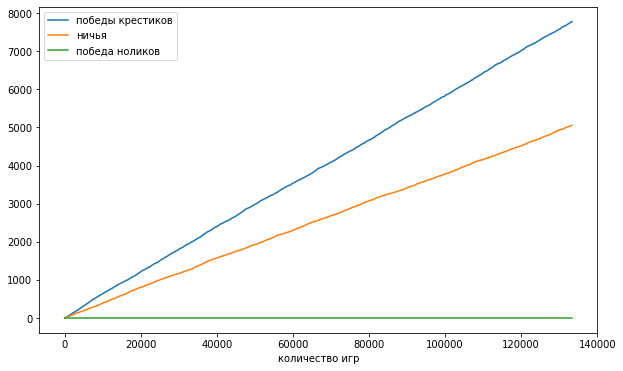

In [10]:
plt.figure(figsize=(10,6))
x, y = counter.tot_list,  counter.cross_list
ax1, = plt.plot(x,y, linestyle='-')

x, y = counter.tot_list,  counter.draw_list
ax2, = plt.plot(x,y, linestyle='-')

x, y = counter.tot_list,  counter.naughts_list
ax3, = plt.plot(x,y, linestyle='-')


plt.legend([ax1, ax2, ax3], ['победы крестиков', 'ничья', 'победа ноликов'])
plt.xlabel('количество игр')
plt.show()

In [9]:
invalid_perc = [float(inv)/float(tot) for inv, tot in zip(counter.invalid_list, counter.tot_list)]

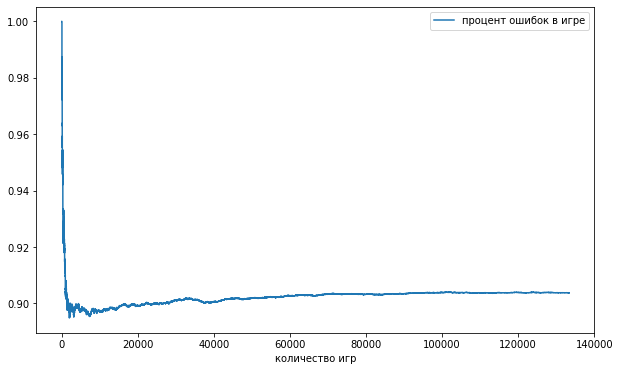

In [11]:
plt.figure(figsize=(10,6))
x, y = counter.tot_list,  invalid_perc
ax1, = plt.plot(x,y, linestyle='-')

plt.legend([ax1], ['процент ошибок в игре'])
plt.xlabel('количество игр')
plt.show()

Если dqn - агент не совершает ошибочного хода, то он выигрывает. Основную проблемы составляют ошибочные ходы, из графика видно, что их процент составляет достаточно большое количеств. Необходимо больше шагов обучения для их уменьшения.